In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np

#### Life History Plots

In [2]:
def Leslie(fecundity, survival):
    n = len(fecundity)
    survival = survival[:n-1]
    L = zero_matrix(QQ, n)
    for i, b in enumerate(fecundity):
        L[0, i] = b
    for i, s in enumerate(survival):
        L[i + 1, i] = s
    return(L)



def is_essentially_real(x):
    if x.imag() == 0:
        return(True)
    else:
        return(False)
    
#Use of "if is_essentiallY_real(e)" rather than "if e in RR" is required since some computational errors
#    seem to come up in the eigenvalue computation, giving us things like x + 0.?e-80*I.

def get_leading_eigenvalue(L):
    evals = L.eigenvalues()
    moduli = [e.n() for e in evals if is_essentially_real(e)]
    moduli = [e for e in moduli if e >= 0]
    r = max(moduli)
    return(r)

In [3]:
A = 11

inst_surv = [(a+1)/(a+2) for a in range(A)]
cum_surv = [prod(inst_surv[0:a]) for a in range(A)]
def fec(x):
    return [x/5]+[x]*(A-1)

In [4]:
def LH(x):
    birth = fec(x)
    return [birth[a]*cum_surv[a] for a in range(A)]

In [5]:
neg_growth = LH(0.2)
no_growth = LH(0.5)
pos_growth = LH(1)

In [10]:
get_leading_eigenvalue(Leslie(fec(0.5), [0.8]*A))

1.16644155884483

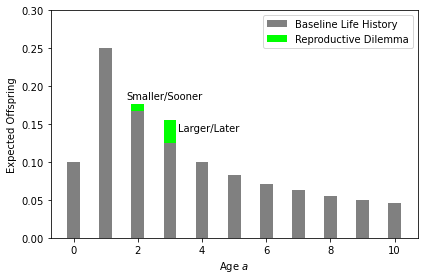

In [8]:
x = np.arange(A)

dilemma = [0,0, 0.01, 0.03, 0, 0, 0, 0, 0, 0, 0]

fig = plt.figure()

plt.ylim([0, 0.3])

plt.bar(x, no_growth, width = 0.4, color = "grey", label = "Baseline Life History")
plt.bar(x, dilemma, color = "lime", width = 0.4, bottom = no_growth, label = "Reproductive Dilemma")

plt.xlabel(r"Age $a$")
plt.ylabel(r"Expected Offspring")

plt.figtext(0.3, 0.64, "Smaller/Sooner")
plt.figtext(0.42, 0.53, "Larger/Later")

plt.legend(loc='upper right')


plt.tight_layout()
plt.show()

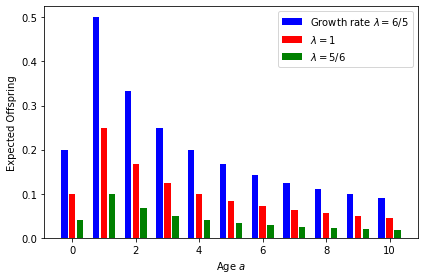

In [9]:
x = np.arange(A)

fig = plt.figure()

plt.bar(x - 1/4, pos_growth, color = 'b', width = 0.2, label = r"Growth rate $\lambda = 6/5$")
plt.bar(x , no_growth, color = 'r', width = 0.2, label = r"$\lambda =1$")
plt.bar(x+1/4, neg_growth, color = 'g', width = 0.2, label = r"$\lambda = 5/6$")


plt.legend(loc='upper right')

plt.xlabel(r"Age $a$")
plt.ylabel(r"Expected Offspring")

plt.tight_layout()
plt.show()

#### Discounting functions

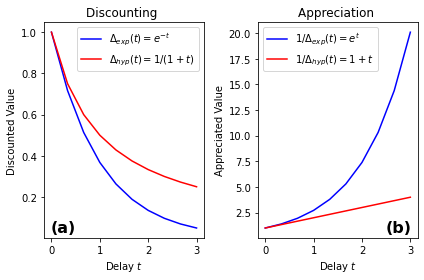

In [2]:
x = np.linspace(0,3,10)

exp_disc = exp(-x)
exp_app = 1/exp_disc

h = 1
hyp_disc = 1/(1+h*x)
hyp_app = 1/hyp_disc


fig = plt.figure()
#figure(figsize=(8, 6), dpi=80)


ax = fig.add_subplot(1, 2, 1)

ax.plot(x, exp_disc, "b", label = r"$\Delta_{exp}(t) = e^{-t}$")
ax.plot(x, hyp_disc, "r", label = r"$\Delta_{hyp}(t) = 1/(1+t)$")

ax.text(0.04, 0.08, '(a)', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

#plt.xticks([0], [0])
#plt.yticks([1], [1])


plt.ylabel("Discounted Value")
plt.xlabel(r"Delay $t$")
plt.title(r"Discounting ")

plt.legend(loc='upper right')


ax = fig.add_subplot(1, 2, 2)


ax.plot(x, exp_app, "b", label = r"$1/\Delta_{{exp}}(t) = e^{t}$")
ax.plot(x, hyp_app, "r", label = r"$1/\Delta_{{hyp}}(t) = 1+t$")

ax.text(0.8, 0.08, '(b)', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

#plt.xticks([0], [0])
#plt.yticks([1], [1])

plt.ylabel("Appreciated Value")
plt.xlabel(r"Delay $t$")
plt.title(r"Appreciation ")

plt.legend(loc='upper left')



plt.tight_layout()
plt.show()

Chocolate gives a benefit of 1 immediately. Fruit salad gives a benefit of delay 2 at delay 10. Plotting a preference reversal. 

In [7]:
x = np.linspace(0,30,100)
r = 1
h = 1

choc_exp_disc = exp(-r*x)
choc_exp_app = 1/choc_exp_disc

choc_hyp_disc = 1/(1+h*x)
choc_hyp_app = 1/hyp_disc

fruit_exp_disc = exp(-r*(x+1))
fruit_exp_app = 1/fruit_exp_disc

fruit_hyp_disc = 1/(1 + h*(x+1))
fruit_hyp_app = 1/fruit_hyp_disc




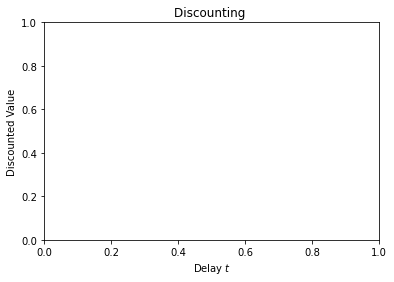

In [11]:
fig = plt.figure()
#figure(figsize=(8, 6), dpi=80)


ax.plot(x, choc_exp_app, "skyblue", label = r"Choc. - Exp.")
ax.plot(x, choc_hyp_app, "r", label = r"Choc. - Hyp.")

ax.plot(x, fruit_exp_app, "mistyrose", label = r"Choc. - Exp.")
ax.plot(x, fruit_hyp_app, "b", label = r"Choc. - Hyp.")


#plt.xticks([0], [0])
#plt.yticks([1], [1])


plt.ylabel("Discounted Value")
plt.xlabel(r"Delay $t$")
plt.title(r"Discounting ")

#plt.legend(loc='upper right')




#plt.tight_layout()
plt.show()

#### Switching Points -- First Example

In [3]:
x = np.linspace(0,3,10)

exponential = exp(-x)
hyp = 1/(1+x)

leap_exp = exp(-(x+1))
leap_hyp = 1/(1+(x+2))

sp_exp = exponential/leap_exp
sp_hyp = hyp/leap_hyp

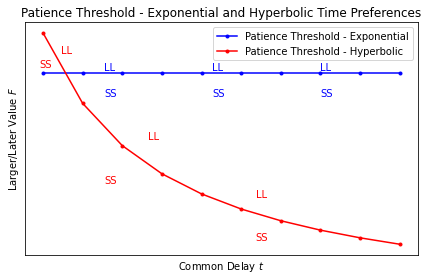

In [11]:
fig = plt.figure()

plt.plot(x, sp_exp, "b.-", label = r"Patience Threshold - Exponential")
plt.plot(x, sp_hyp, "r.-", label = r"Patience Threshold - Hyperbolic")

plt.ylabel(r"Larger/Later Value $F$")
plt.xlabel(r"Time at Dilemma $t$")
plt.title(r"Patience Threshold - Exponential and Hyperbolic Time Preferences")

plt.xticks([], [])
plt.yticks([], [])

plt.figtext(0.25, 0.65, "SS", c = "b")
plt.figtext(0.5, 0.65, "SS", c = "b")
plt.figtext(0.75, 0.65, "SS", c = "b")

plt.figtext(0.25, 0.74, "LL", c = "b")
plt.figtext(0.5, 0.74, "LL", c = "b")
plt.figtext(0.75, 0.74, "LL", c = "b")

plt.figtext(0.1, 0.75, "SS", c="r")
plt.figtext(0.15, 0.8, "LL", c="r")

plt.figtext(0.25, 0.35, "SS", c="r")
plt.figtext(0.35, 0.5, "LL", c="r")

plt.figtext(0.6, 0.15, "SS", c="r")
plt.figtext(0.6, 0.3, "LL", c="r")

plt.legend(loc='upper right')


plt.tight_layout()
plt.show()

## Present value with hyperbolic discounting

In [13]:
x = np.linspace(0,3,10)
ss = 1/(1 + x)
ll = 1.5/(1 + (x + 1))

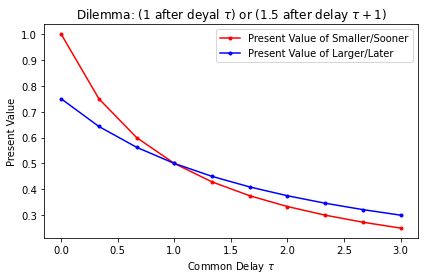

In [14]:
fig = plt.figure()

plt.plot(x, ss, "r.-", label = r"Present Value of Smaller/Sooner")
plt.plot(x, ll, "b.-", label = r"Present Value of Larger/Later")

plt.ylabel("Present Value")
plt.xlabel(r"Common Delay $\tau$")
plt.title(r"Dilemma: (1 after deyal $\tau$) or (1.5 after delay $\tau + 1)$")

plt.legend(loc='upper right')


plt.tight_layout()
plt.show()

#### Switching point with Hyperbolic Discounting

In [13]:
x = np.linspace(0,3,10)

hyp_disc = 1/(1+x)
lag_hyp_disc = 1/(1+(x+1))



ss = 1/(1 + x)
ll = 1.5/(1 + (x + 1))

ss_exp = exp(-0.5*x)
ll_exp = exp(-0.5*(x+1))

utvr_hyp = hyp_disc/lag_hyp_disc

thresh_exp = ss_exp/ll_exp

<Figure size 432x288 with 0 Axes>

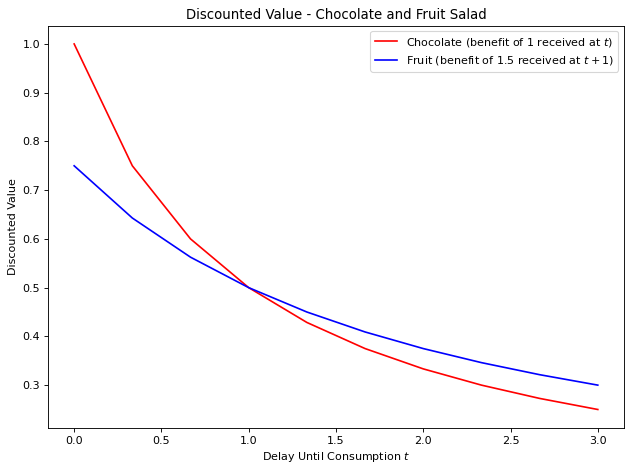

In [14]:
fig = plt.figure()
figure(figsize=(8, 6), dpi=80)

plt.plot(x, ss, "r", label = r"Chocolate (benefit of 1 received at $t$)")
plt.plot(x, ll, "b", label = r"Fruit (benefit of 1.5 received at $t+1$)")

plt.ylabel("Discounted Value")
plt.xlabel(r"Delay Until Consumption $t$")
plt.title(r"Discounted Value - Chocolate and Fruit Salad")

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

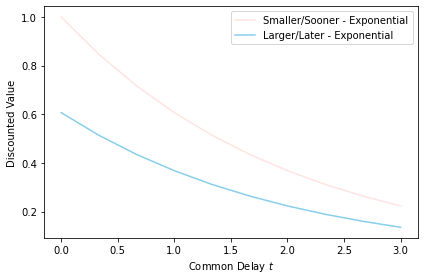

In [15]:
fig = plt.figure()

plt.plot(x, ss_exp, "mistyrose", label = r"Smaller/Sooner - Exponential")
plt.plot(x, ll_exp, "skyblue", label = r"Larger/Later - Exponential")

plt.ylabel("Discounted Value")
plt.xlabel(r"Common Delay $t$")
#plt.title(r"Discounted Value - [1 at delay $t$] and [1.5 at delay $t+1$]")

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

It has taken me a bit to figure this out, so I need to write it down so that I never forget. Throughout this description, $t$ is the common delay prior to consumption of each good. 

Discounting is straightforward. Take the value of SS and discount to $\Delta(t)$. Take the value of LL and discount to $\Delta(t+10)$.

Appreciation is the mirror image. Take the value of SS and appreciate to $1/\Delta(t + 10)$. Take the value of LL and appreciate to $1/\Delta(t)$. 

In [99]:
t = np.linspace(0,10,100)
r = 0.05
h = 0.2

choc_exp_disc = exp(-r*t)
choc_exp_app = 1/exp(-r*(t+10))

choc_hyp_disc = 1/(1+h*t)
choc_hyp_app = 1 + h*(t+10)

fruit_exp_disc = 2*exp(-r*(t+10))
fruit_exp_app = 2/exp(-r*(t))

fruit_hyp_disc = 2/(1 + h*(t+10))
fruit_hyp_app = 2 / (1/(1 + h*t))


In [100]:
fruit_hyp_app

array([2.        , 2.04040404, 2.08080808, 2.12121212, 2.16161616,
       2.2020202 , 2.24242424, 2.28282828, 2.32323232, 2.36363636,
       2.4040404 , 2.44444444, 2.48484848, 2.52525253, 2.56565657,
       2.60606061, 2.64646465, 2.68686869, 2.72727273, 2.76767677,
       2.80808081, 2.84848485, 2.88888889, 2.92929293, 2.96969697,
       3.01010101, 3.05050505, 3.09090909, 3.13131313, 3.17171717,
       3.21212121, 3.25252525, 3.29292929, 3.33333333, 3.37373737,
       3.41414141, 3.45454545, 3.49494949, 3.53535354, 3.57575758,
       3.61616162, 3.65656566, 3.6969697 , 3.73737374, 3.77777778,
       3.81818182, 3.85858586, 3.8989899 , 3.93939394, 3.97979798,
       4.02020202, 4.06060606, 4.1010101 , 4.14141414, 4.18181818,
       4.22222222, 4.26262626, 4.3030303 , 4.34343434, 4.38383838,
       4.42424242, 4.46464646, 4.50505051, 4.54545455, 4.58585859,
       4.62626263, 4.66666667, 4.70707071, 4.74747475, 4.78787879,
       4.82828283, 4.86868687, 4.90909091, 4.94949495, 4.98989

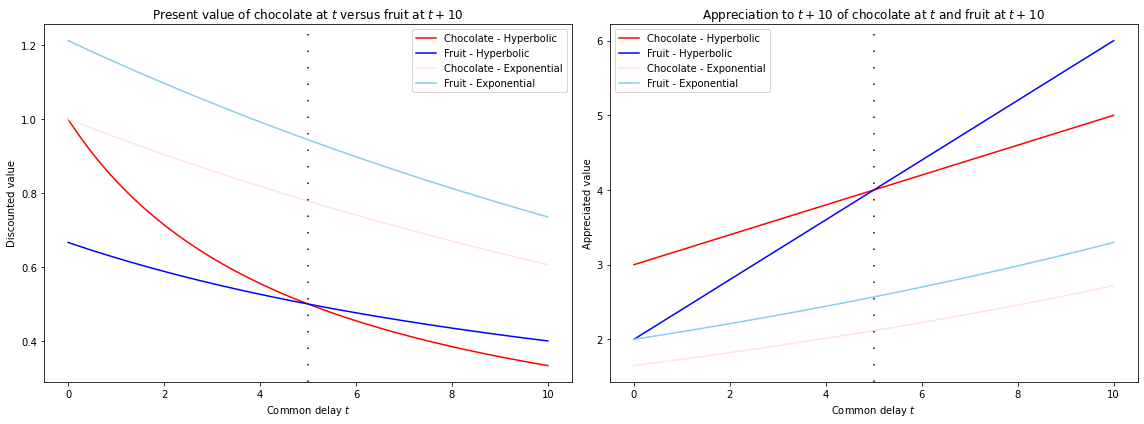

In [128]:
fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 2, 1)


plt.plot(t, choc_hyp_disc, "r", label = r"Chocolate - Hyperbolic")
plt.plot(t, fruit_hyp_disc, "b", label = r"Fruit - Hyperbolic")

plt.plot(t, choc_exp_disc, "mistyrose", label = r"Chocolate - Exponential")
plt.plot(t, fruit_exp_disc, "skyblue", label = r"Fruit - Exponential")

plt.axvline(x=5, linestyle = (0, (1, 10)), color = "black")

plt.ylabel("Discounted value")
plt.xlabel(r"Common delay $t$")
plt.title(r"Present value of chocolate at $t$ versus fruit at $t + 10$")

plt.legend(loc='upper right')

ax = fig.add_subplot(1, 2, 2)


plt.plot(t, choc_hyp_app, "r", label = r"Chocolate - Hyperbolic")
plt.plot(t, fruit_hyp_app, "b", label = r"Fruit - Hyperbolic")

plt.plot(t, choc_exp_app, "mistyrose", label = r"Chocolate - Exponential")
plt.plot(t, fruit_exp_app, "skyblue", label = r"Fruit - Exponential")




plt.axvline(x=5, linestyle = (0, (1, 10)), color = "black")
#plt.axvline(x=3, linestyle = (0, (1, 10)), color = "black")


plt.ylabel("Appreciated value")
plt.xlabel(r"Common delay $t$")
plt.title(r"Appreciation to $t + 10$ of chocolate at $t$ and fruit at $t + 10$")

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

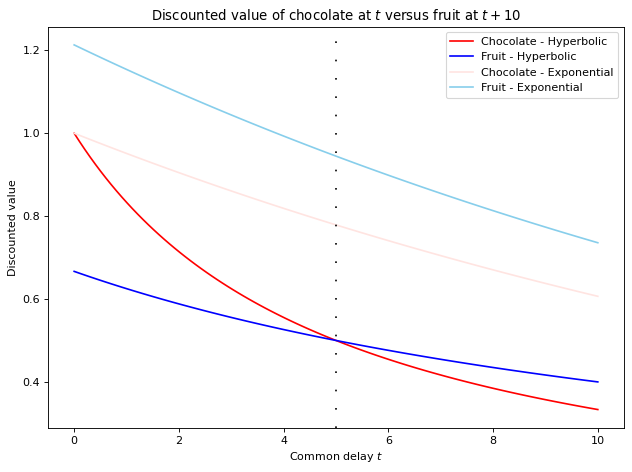

In [101]:
fig = plt.figure()
figure(figsize=(8, 6), dpi=80)

plt.plot(t, choc_hyp_disc, "r", label = r"Chocolate - Hyperbolic")
plt.plot(t, fruit_hyp_disc, "b", label = r"Fruit - Hyperbolic")

plt.plot(t, choc_exp_disc, "mistyrose", label = r"Chocolate - Exponential")
plt.plot(t, fruit_exp_disc, "skyblue", label = r"Fruit - Exponential")




plt.axvline(x=5, linestyle = (0, (1, 10)), color = "black")
#plt.axvline(x=3, linestyle = (0, (1, 10)), color = "black")


plt.ylabel("Discounted value")
plt.xlabel(r"Common delay $t$")
plt.title(r"Discounted value of chocolate at $t$ versus fruit at $t + 10$")

plt.legend(loc='upper right')


plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

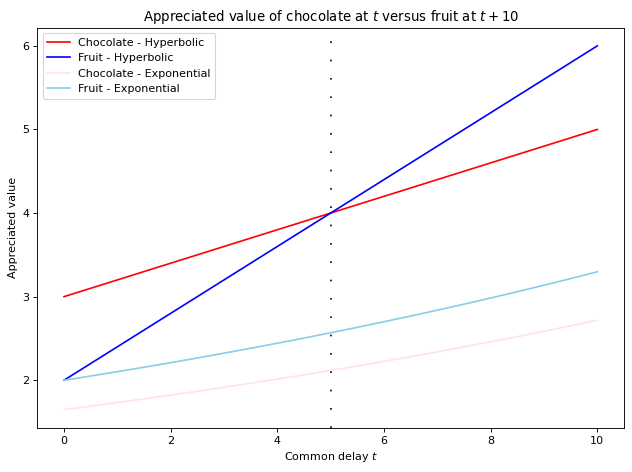

In [105]:
fig = plt.figure()
figure(figsize=(8, 6), dpi=80)

plt.plot(t, choc_hyp_app, "r", label = r"Chocolate - Hyperbolic")
plt.plot(t, fruit_hyp_app, "b", label = r"Fruit - Hyperbolic")

plt.plot(t, choc_exp_app, "mistyrose", label = r"Chocolate - Exponential")
plt.plot(t, fruit_exp_app, "skyblue", label = r"Fruit - Exponential")




plt.axvline(x=5, linestyle = (0, (1, 10)), color = "black")
#plt.axvline(x=3, linestyle = (0, (1, 10)), color = "black")


plt.ylabel("Appreciated value")
plt.xlabel(r"Common delay $t$")
plt.title(r"Appreciated value of chocolate at $t$ versus fruit at $t + 10$")

plt.legend(loc='upper left')


plt.tight_layout()
plt.show()

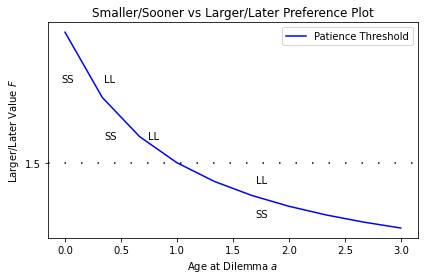

In [41]:
fig = plt.figure()

plt.plot(x, utvr_hyp, "b", label = r"Patience Threshold")
#plt.plot(x, thresh_exp, "skyblue", label = "Patience Threshold - Exponential")


plt.axhline(y=1.5, linestyle = (0, (1, 10)), color = "black")
#plt.axvline(x=1, linestyle = (0, (1, 10)), color = "black")


plt.ylabel(r"Larger/Later Value $F$")
plt.xlabel(r"Age at Dilemma $a$")
plt.title(r"Smaller/Sooner vs Larger/Later Preference Plot")

plt.legend(loc='upper right')



plt.figtext(0.25, 0.5, "SS")
plt.figtext(0.15, 0.7, "SS")
plt.figtext(0.6, 0.23, "SS")

plt.figtext(0.35, 0.5, "LL")
plt.figtext(0.25, 0.7, "LL")
plt.figtext(0.6, 0.35, "LL")

plt.yticks([1.5], ["1.5"])


plt.tight_layout()
plt.show()

#### Unit Time Value Retained (UTVR)

In [82]:
x = np.linspace(0,10,100)

exponential = exp(-x)
hyp = 1/(1+x)
super_exp = exp(-x^2)

leap_exp = exp(-(x+1))
leap_hyp = 1/(1+(x+2))
leap_super_exp = exp(-(x+1)^(2))

utvr_exp = leap_exp/exponential
utvr_hyp = leap_hyp/hyp
utvr_super_exp = leap_super_exp/super_exp

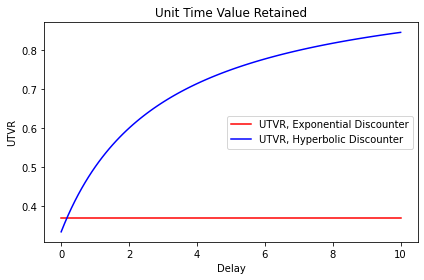

In [84]:
fig = plt.figure()

plt.plot(x, utvr_exp, "r", label = "UTVR, Exponential Discounter")
plt.plot(x, utvr_hyp, "b", label = "UTVR, Hyperbolic Discounter")
#plt.plot(x, utvr_super_exp, "g", label = "UTVR, Super-Exponential Discounter")

plt.xlabel("Delay")
plt.ylabel("UTVR")
plt.title("Unit Time Value Retained")

plt.legend(loc='center right')

plt.tight_layout()
plt.show()

#### Preference Reversals, UTVR

In [14]:
x = np.linspace(1,5,100)
ss = 1 - 0.1*x
ll1 = -0.2 + exp(-0.03*x)
ll2 = -0.3 + exp(-0.03*x)

#### Increasing Survival -- Appreciation Plots

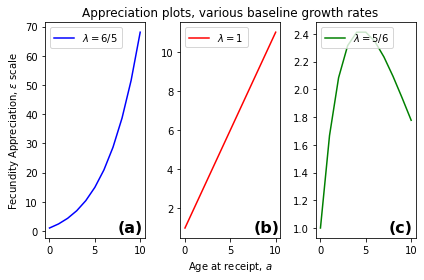

In [56]:
x = np.arange(11)
lamb = 6/5

pos_growth = (lamb^x)*(1 + x)
no_growth = (1+x)
neg_growth = (lamb^(-x))*(1+x)



fig = plt.figure()

ax = fig.add_subplot(1,3,3)

ax.plot(x, neg_growth, "g", label = r"$\lambda = 5/6$")
ax.text(0.73, 0.08, '(c)', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')


plt.legend(loc='upper left')


ax = fig.add_subplot(1,3,2)

ax.plot(x, no_growth, "r", label = r"$\lambda = 1$")
ax.text(0.73, 0.08, '(b)', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

plt.xlabel(r"Age at receipt, $a$")
plt.title("Appreciation plots, various baseline growth rates")

plt.legend(loc='upper left')



ax = fig.add_subplot(1,3,1)
ax.plot(x, pos_growth, "b", label = r"$\lambda = 6/5$")
ax.plot([0], [1.9])
ax.text(0.73, 0.08, '(a)', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

plt.ylabel(r"Fecundity Appreciation, $\varepsilon$ scale")


plt.legend(loc='upper left')



plt.tight_layout()
plt.show()


#### Increasing survival -- Switching point plots

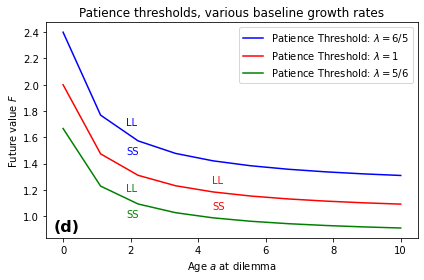

In [73]:
x = np.linspace(0, 10, 10)
lamb = 6/5

pos_growth = (lamb^(-x))*1/(1 + x)
no_growth = 1/(1+x)
neg_growth = (lamb^(x))*1/(1+x)

lag_pos_growth = (lamb^(-x-1))*1/(1 + x + 1)
lag_no_growth = 1/(1+x + 1)
lag_neg_growth = (lamb^(x+1))*1/(1+x + 1)

sp_pos_growth = pos_growth/lag_pos_growth
sp_no_growth = no_growth/lag_no_growth
sp_neg_growth = neg_growth/lag_neg_growth

fig = plt.figure()

plt.plot(x, sp_pos_growth, "b", label = r"Patience Threshold: $\lambda = 6/5$")
plt.plot(x, sp_no_growth, "r", label = r"Patience Threshold: $\lambda = 1$")
plt.plot(x, sp_neg_growth, "g", label = r"Patience Threshold: $\lambda = 5/6$")

plt.figtext(0.3, 0.55, "LL", c = "b")
plt.figtext(0.30, 0.45, "SS", c = "b")

plt.figtext(0.5, 0.35, "LL", c = "r")
plt.figtext(0.5, 0.26, "SS", c = "r")

plt.figtext(0.3, 0.32, "LL", c = "g")
plt.figtext(0.3, 0.23, "SS", c = "g")



plt.xlabel(r"Age $a$ at dilemma")
plt.ylabel(r"Future value $F$")
plt.title("Patience thresholds, various baseline growth rates")

plt.text(0.05, 0.07, '(d)', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')


plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


#### Fitness indifference plots

[]

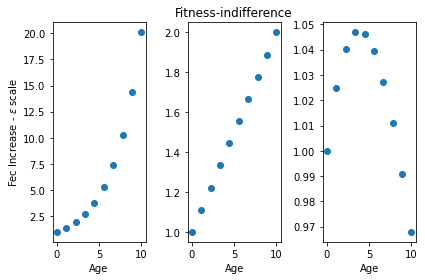

In [25]:
x = np.linspace(0, 10, 10)

app_hyp = 1 + x
app_exp = exp(0.3*x)
app_weird = (1+0.1*x)*(0.93)^(x)

fig = plt.figure()



plt.subplot(1, 3, 1)
plt.ylabel(r"Fec Increase - $\varepsilon$ scale")


plt.plot(x, app_exp, "o")
plt.xlabel("Age")

plt.subplot(1, 3, 2)
plt.plot(x, app_hyp, "o")

plt.xlabel("Age")
plt.title("Fitness-indifference")



plt.subplot(1, 3, 3)
plt.plot(x, app_weird, "o")

plt.xlabel("Age")


plt.tight_layout()

plt.plot()

#### Life history for squirrels

In [18]:
P = [230.49,1000,886]
X = GeneralDiscreteDistribution(P)

def pregnancy_simulation(Z, offspring_threshold, n = 1000, verbose = False, life_history = False, all_details = False):
    nut_findings = [Z.get_random_element() for _ in range(n)]
    offspring_days = [0]*n
    nuts_in_storage = 0
    offspring_count = 0
    pregnant = False
    for k in range(n):
        nut_finding = nut_findings[k]
        nuts_in_storage += nut_finding - 1
        if nuts_in_storage < 0:
            break
        if pregnant:
            offspring_count += 1
            offspring_days[k] = 1
            pregnant = False
        if not pregnant and nuts_in_storage > offspring_threshold:
            pregnant = True
            nuts_in_storage += -1
    to_be_returned = None
    msg = 'Lived until {} - produced {} offspring'.format(k+1, offspring_count)
    bare_facts = (k+1, offspring_count)
    life_hist = offspring_days
    if verbose:
        return(msg)
    if life_history:
        return(life_hist)
    if all_details:
        return([bare_facts, life_hist])
    else:
        return(bare_facts)
    
    
def get_life_histories(Z, offspring_threshold, num_simulations = 1000):
    life_histories = []
    for i in range(num_simulations):
        life_histories.append(pregnancy_simulation(Z, offspring_threshold, life_history=True))
    return(life_histories)

def truncate_at_zeroes(some_list, num_zeroes = 5):
    support = [i for i, e in enumerate(some_list) if e != 0]
    truncation_point = max(support) + num_zeroes + 1
    truncated_list = deepcopy(some_list[:truncation_point])
    return(truncated_list)



def get_avg_num_offspring(life_histories):
    avg_num_offspring = [mean([lh[k] for lh in life_histories]).n() for k in range(len(life_histories[0]))]
    avg_num_offspring = truncate_at_zeroes(avg_num_offspring)
#    avg_num_offspring = [ (i, avg_num_offspring[i]) for i in range(len(avg_num_offspring))]
    return(avg_num_offspring)

def get_avg_life_history(Z, offspring_threshold, num_simulations = 1000):
    lh = get_life_histories(Z, offspring_threshold, num_simulations)
    aggregate_life_history = get_avg_num_offspring(lh)
    return(aggregate_life_history)


lh0 = get_avg_life_history(X, 0, num_simulations=10000)
lh1 = get_avg_life_history(X, 1, num_simulations=10000)

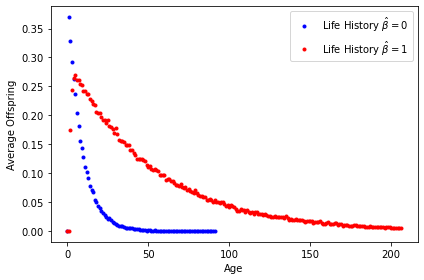

In [20]:
fig = plt.figure()

plt.plot(list(range(len(lh0))), lh0, "b.", label = r"Life History $\hat\beta = 0$")
plt.plot(list(range(len(lh1)-300)), lh1[:-300], "r.", label = r"Life History $\hat\beta = 1$")


plt.xlabel("Age")
plt.ylabel("Average Offspring")

plt.tight_layout()


plt.legend(loc='upper right')
plt.show()

#### Squirrel Banking Survival Schedules. 

In [2]:
def is_essentially_real(x):
    if x.imag() == 0:
        return(True)
    else:
        return(False)
    
#Use of "if is_essentiallY_real(e)" rather than "if e in RR" is required since some computational errors
#    seem to come up in the eigenvalue computation, giving us things like x + 0.?e-80*I.

def get_leading_eigenvalue(L):
    evals = L.eigenvalues()
    moduli = [e.n() for e in evals if is_essentially_real(e)]
    moduli = [e for e in moduli if e >= 0]
    r = max(moduli)
    return(r)

def normalize(vec):
    vec = vector(vec)
    tot = sum(vec)
    vec = vec/tot
    return(vec)

In [3]:
def single_Lbetahat0(p0, p1, p2):
    L = zero_matrix(QQ, 2)
    L[0,0] = p1
    L[1, 0] = p2
    L[0, 1] = (p1+p2)
    L[1, 1] = 0
    return L

def single_Lbetahat1(p0, p1, p2):
    L = zero_matrix(QQ, 3)
    L[0,0] = p1
    L[1,0] = p2
    L[2, 0] = 0
    L[0, 1] = p0
    L[1, 1] = p1
    L[2, 1] = p2
    L[0, 2] = p0
    L[1, 2] = (p1 + p2)
    L[2, 2] = 0

    return L

def single_Lbetahat(p0, p1, p2, betahat, double_pregnancy = False, s = 1):
    normalized = normalize((p0, p1, p2))
    p0 = normalized[0]
    p1 = normalized[1]    
    p2 = normalized[2]
    if betahat == 0:
        L = single_Lbetahat0(p0, p1, p2)
    elif betahat == 1:
        L = single_Lbetahat1(p0, p1, p2)
    else:
        L = zero_matrix(QQ, betahat + 2)
        for i in range(betahat+1):
            L[i, i] = p1
            if i < betahat+1:
                L[i + 1, i] = p2
                if i > 0:
                    L[i-1, i] = p0
        L[0, betahat+1] = 0
        L[betahat - 1, betahat+1] = p0
        L[betahat, betahat+1] = (p1 + p2)
        L[betahat+1, betahat+1] = 0      
    return(L)

def get_surv(L, len_surv = 10):
    betahat = L.dimensions()[0] - 2
    v = vector([1] + [0]*(betahat+1))
    
    surv = []
    for _ in range(len_surv):
        prob_alive = sum(v)
        v = L*v
        s = sum(v)/prob_alive
        surv.append(s.n())
        
    return surv   

In [23]:
squirrel_surv0 = get_surv(single_Lbetahat(40,32, 62, 0), 30)
squirrel_surv2 = get_surv(single_Lbetahat(1.1, 1, 1.12, 10), 30)

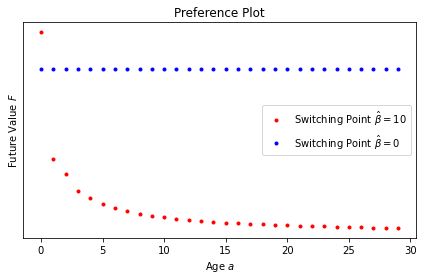

In [24]:
fig = plt.figure()

plt.plot(list(range(len(squirrel_surv2))), [1/s for s in squirrel_surv2], "r.", label = r"Switching Point $\hat\beta = 10$")
#plt.plot(list(range(len(squirrel_surv1))), squirrel_surv1, "r", label = r"Switching Point $\hat\beta = 3$")
plt.plot(list(range(len(squirrel_surv0))), [1/s for s in squirrel_surv0], "b.", label = r"Switching Point $\hat\beta = 0$")




plt.xlabel(r"Age $a$")
plt.ylabel(r"Future Value $F$")
plt.title("Preference Plot")

plt.yticks([], [])


plt.tight_layout()



plt.legend(loc='center right')
plt.show()

#### Siler Stuff - Human UTVR and Siler Survival Function

Data from Gurven and Kaplan, Table 2. 

Hadza: (a1 = 0.351, a2 = 0.011, a3 = 6.7*(10^(-6)), b1 = 0.895, b3 = 0.125)
Ache forest: (a1 = 0.157, a2 = 0.013, a3 = 4.8*(10^(-5)), b1 = 0.721, b3 = 0.103)
Hiwi: (a1 = 0.458, a2 = 0.020, a3 = 6.32*(10^(-9)), b1 = 1.39, b3 = 0.251)
!Kung: (a1 = 0.340, a2 = 0.010, a3 = 3.31*(10^(-4)), b1 = 0.913, b3 = 0.077)

Wild chimps: (a1 = 0.248, a2 = 0.028, a3 = 7.53*(10^(-3)), b1 = 0.608, b3 = 0.063)

In [135]:
def get_siler_surv(a1, a2, a3, b1, b3):
    
    def siler_surv(a, a1 = a1, a2 = a2, a3 = a3, b1 = b1, b3 = b3):
        return 1 - (a1*e^(-b1*a) + a2 + a3*e^(b3*a))
    
    return siler_surv

def get_siler_sp(a1 = 0.351, a2 = 0.011, a3 = 6.7*(10^(-6)), b1 = 0.895, b3 = 0.125, lamb = 1, max_age = 70):
    """
    SP is Switching Point
    """
    surv_fun = get_siler_surv(a1, a2, a3, b1, b3)
    
    surv = [surv_fun(a) for a in range(max_age)]
    
    sp = [lamb/surv[a] for a in range(max_age)]
    
    return sp

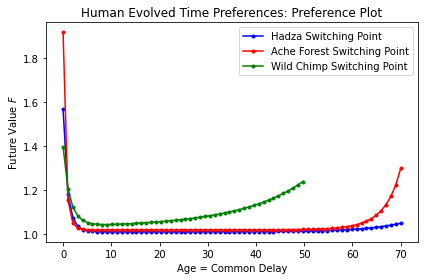

In [141]:
max_age = 70
x = np.linspace(0, max_age, max_age)

hadza_sp = get_siler_sp(a1 = 0.351, a2 = 0.011, a3 = 6.7*(10^(-6)), b1 = 0.895, b3 = 0.125)
hiwi_sp = get_siler_sp(a1 = 0.458, a2 = 0.020, a3 = 6.32*(10^(-9)), b1 = 1.39, b3 = 0.251)
chimp_sp = get_siler_sp(a1 = 0.248, a2 = 0.028, a3 = 7.53*(10^(-3)), b1 = 0.608, b3 = 0.063)


fig = plt.figure()

plt.plot(x, hadza_sp, "b.-", label = r"Hadza Switching Point")
plt.plot(x, hiwi_sp, "r.-", label = r"Ache Forest Switching Point")
plt.plot(x[:50], chimp_sp[:50], "g.-", label = r"Wild Chimp Switching Point")



plt.title("Human Evolved Time Preferences: Preference Plot")
plt.xlabel("Age = Common Delay")
plt.ylabel(r"Future Value $F$")

plt.tight_layout()


plt.legend(loc='upper right')
plt.show()

In [59]:
max_age = 80
lambda0 = 1.00039

def get_siler_surv(a1, a2, a3, b1, b3):
    
    def siler_surv(a, a1 = a1, a2 = a2, a3 = a3, b1 = b1, b3 = b3):
        return 1 - (a1*e^(-b1*a) + a2 + a3*e^(b3*a))
    
    return siler_surv

def hadza_surv(a):
    hadza = get_siler_surv(a1 = 0.351, a2 = 0.011, a3 = 6.7*(10^(-6)), b1 = 0.895, b3 = 0.125)
    return hadza(a)

single_hadza = [hadza_surv(a) for a in range(max_age)]

cum_hadza = [prod([hadza_surv(a) for a in range(alpha)]) for alpha in range(max_age)]
offset_cum_hadza = [prod([hadza_surv(a) for a in range(alpha+1)]) for alpha in range(max_age)]

utvr = [(1/lambda0)*offset_cum_hadza[a]/cum_hadza[a] for a in range(max_age)]

x = x = np.linspace(0, max_age, max_age)

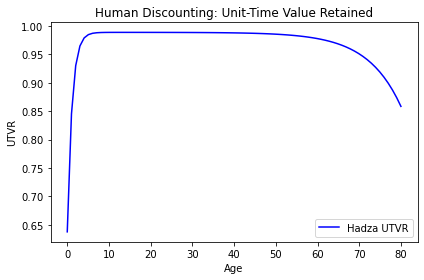

In [60]:
fig = plt.figure()

plt.plot(x, utvr, "b", label = r"Hadza UTVR")

plt.title("Human Discounting: Unit-Time Value Retained")
plt.xlabel("Age")
plt.ylabel("UTVR")

plt.tight_layout()


plt.legend(loc='lower right')
plt.show()

#### Human Switching-Point plot (inverse of UTVR)

In [278]:
max_age = 80
lambda0 = 1.00039

def get_siler_surv(a1, a2, a3, b1, b3):
    
    def siler_surv(a, a1 = a1, a2 = a2, a3 = a3, b1 = b1, b3 = b3):
        return 1 - (a1*e^(-b1*a) + a2 + a3*e^(b3*a))
    
    return siler_surv

def hadza_surv(a):
    hadza = get_siler_surv(a1 = 0.351, a2 = 0.011, a3 = 6.7*(10^(-6)), b1 = 0.895, b3 = 0.125)
    return hadza(a)

single_hadza = [hadza_surv(a) for a in range(max_age)]

cum_hadza = [prod([hadza_surv(a) for a in range(alpha)]) for alpha in range(max_age)]
offset_cum_hadza = [prod([hadza_surv(a) for a in range(alpha+1)]) for alpha in range(max_age)]

switching_point = [(lambda0)*cum_hadza[a]/offset_cum_hadza[a] for a in range(max_age)]

x = x = np.linspace(0, max_age, max_age)

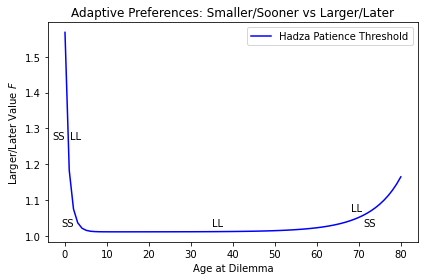

In [292]:
fig = plt.figure()

plt.plot(x, switching_point, "b", label = r"Hadza Patience Threshold")

plt.title("Adaptive Preferences: Smaller/Sooner vs Larger/Later")
plt.xlabel("Age at Dilemma")
plt.ylabel(r"Larger/Later Value $F$")

plt.figtext(0.13, 0.5, "SS")
plt.figtext(0.15, 0.2, "SS")
plt.figtext(0.85, 0.2, "SS")

plt.figtext(0.17, 0.5, "LL")
plt.figtext(0.5, 0.2, "LL")
plt.figtext(0.82, 0.25, "LL")

plt.tight_layout()


plt.legend(loc='upper right')
plt.show()